In [1]:
# import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# SkLearn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [2]:
# Set matplotlib inline
%matplotlib inline
from pandas.plotting import scatter_matrix
rcParams['figure.figsize'] = 5,4

In [3]:
# Importing CSV Data
global_df = pd.read_csv('country_level_data_0.csv')
global_df.head()

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2.141361e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,1.030423e+11,51.8,6.7,4.4,11.50,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,1.347108e+10,51.4,4.5,4.8,15.21,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,3.319880e+09,31.2,8.2,2.6,11.60,35.1,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [4]:
# Cleaning Dataframe
clean_global_df = global_df[['region_id','country_name','gdp','population_population_number_of_people','total_msw_total_msw_generated_tons_year',]]

# Adding Normalised GDP and Normalised Waste Disposal Columns
clean_global_df['GDP per capita'] = 'abc'
clean_global_df['Annual Total MSW per capita'] = 'abc'

# Normalising gdp with population
for i in range(0, len(clean_global_df['country_name'])):
    clean_global_df['GDP per capita'][i] = round(round(clean_global_df['gdp'][i])/round(clean_global_df['population_population_number_of_people'][i]),0)
    clean_global_df['Annual Total MSW per capita'][i] = clean_global_df['total_msw_total_msw_generated_tons_year'][i]/(clean_global_df['population_population_number_of_people'][i])
    
clean_global_df.rename(columns={'population_population_number_of_people':'population','total_msw_total_msw_generated_tons_year':'total msw'}, inplace=True) 

# Removing countries that does not have any usable data on either GDP per capita or Annual Total MSW per capita
clean_global_df = clean_global_df.dropna()
clean_global_df

# Changing the dtypes of Annual Total MSW Per Capita and GDP Per Capita
clean_global_df['Annual Total MSW per capita'] = pd.to_numeric(clean_global_df['Annual Total MSW per capita'])
clean_global_df['GDP per capita'] = pd.to_numeric(clean_global_df['GDP per capita'])
clean_global_df.dtypes

region_id                       object
country_name                    object
gdp                            float64
population                     float64
total msw                      float64
GDP per capita                 float64
Annual Total MSW per capita    float64
dtype: object

Text(79.0, 0.5, 'Annual Total MSW per capita')

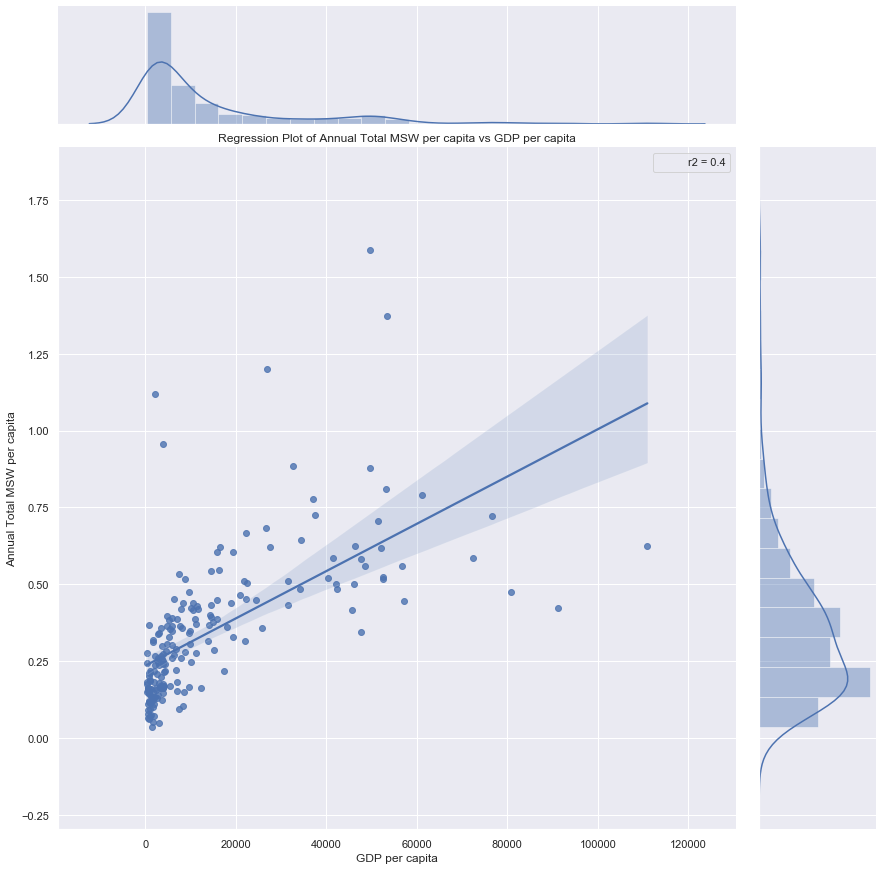

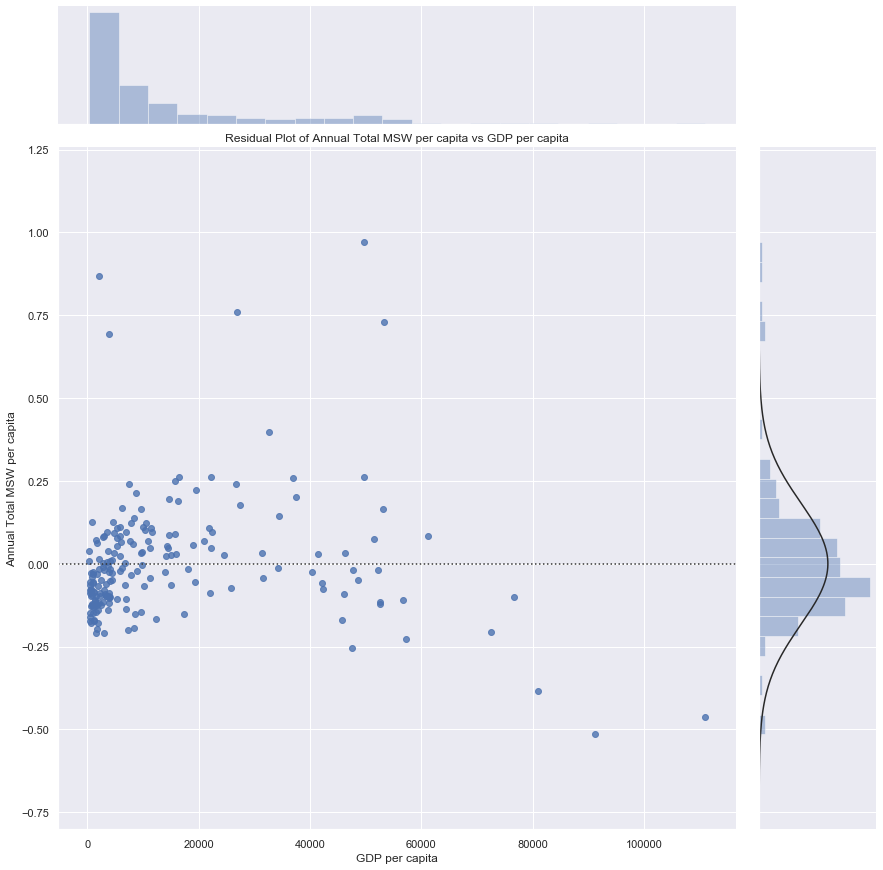

In [5]:
## Graph of y = 'Annual Total MSW per capita' (response) and x = 'GDP per capita' (regressor)

# function to retrieve and display r^2 value
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

# Data preparation
x = clean_global_df['GDP per capita'].tolist()
y = clean_global_df['Annual Total MSW per capita'].tolist()

g = sns.jointplot(x, y, kind='reg', stat_func=r2, size=12)
plt.title('Regression Plot of Annual Total MSW per capita vs GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita')  

f = sns.jointplot(x, y, kind='resid', stat_func=r2, size=12)
plt.title('Residual Plot of Annual Total MSW per capita vs GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

In [6]:
# Performing Simple Linear Regression for Grouped Countries based on Continent
continent_df = clean_global_df.sort_values('region_id', ascending=True)
continent_df.head()

,region_id,country_name,gdp,population,total msw,GDP per capita,Annual Total MSW per capita
153,EAS,Philippines,2.843485e+11,1.033202e+08,1.463192e+07,2752.0,0.141617
36,EAS,China,9.505157e+12,1.371220e+09,2.100000e+08,6932.0,0.153148
133,EAS,Northern Mariana Islands,1.051785e+09,5.403600e+04,3.276141e+04,19465.0,0.606289
197,EAS,Tuvalu,3.921616e+07,1.109700e+04,3.989486e+03,3534.0,0.359510
132,EAS,Mongolia,1.182537e+10,3.027398e+06,2.900000e+06,3906.0,0.957918


### Slicing Dataframe into Individual Continent Sets

Text(79.0, 0.5, 'Annual Total MSW per capita')

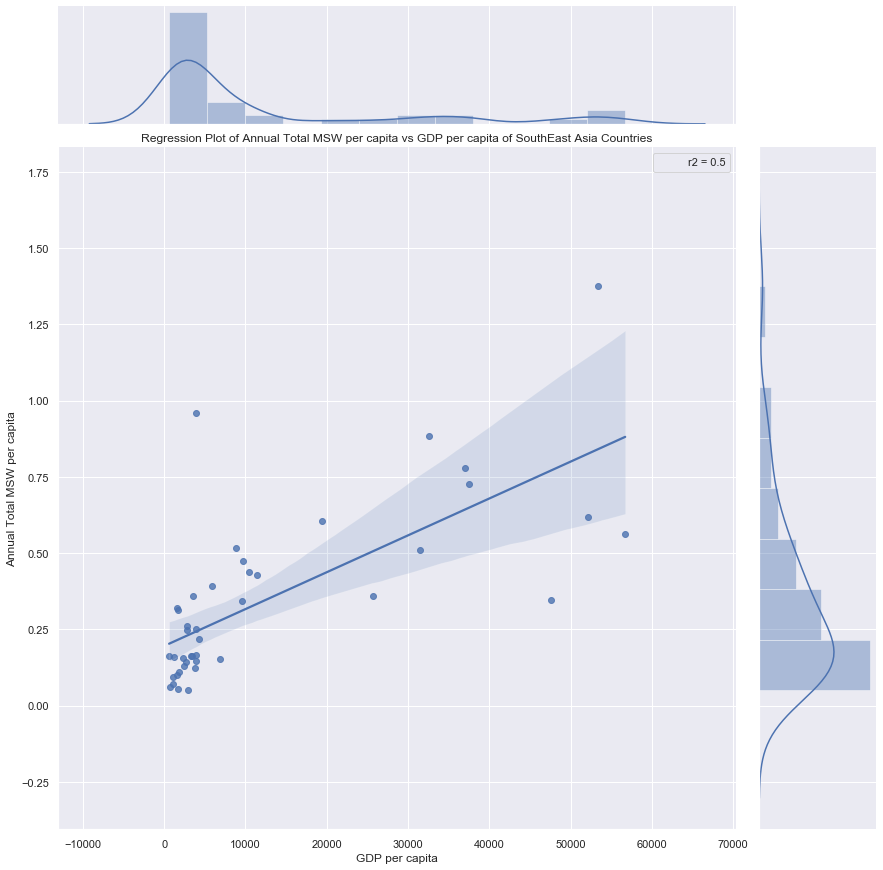

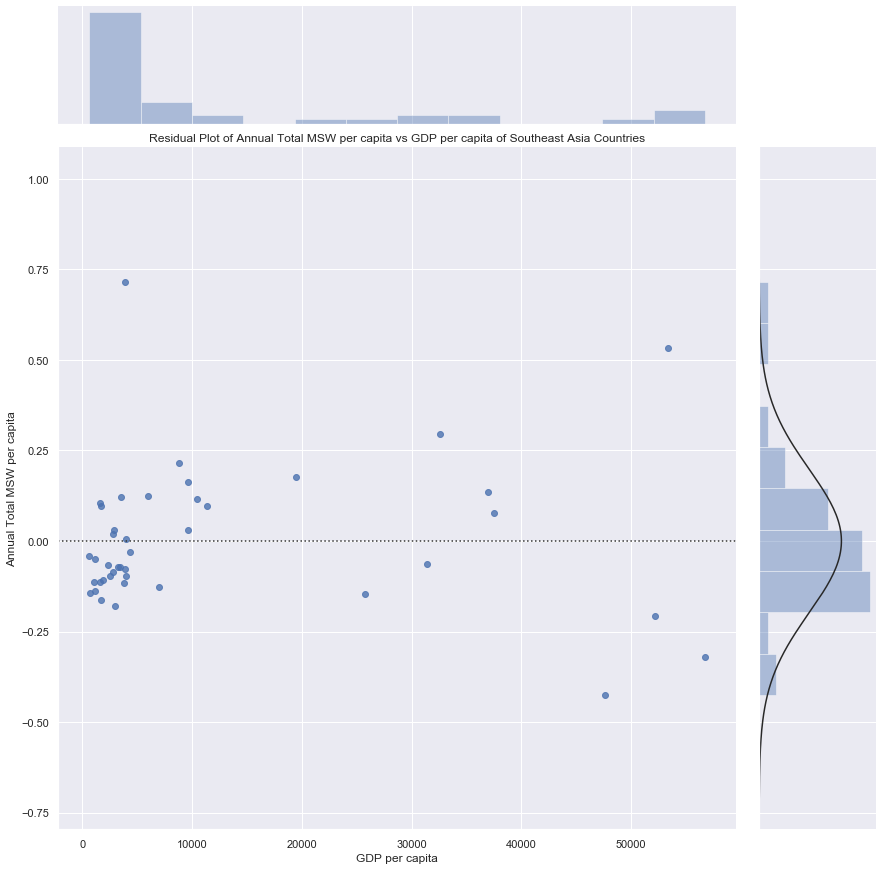

In [7]:
# Southeast Asia
EAS_SAS_df = continent_df.loc[(continent_df['region_id'] == 'EAS') | (continent_df['region_id'] == 'SAS')]
x_EAS_SAS = EAS_SAS_df['GDP per capita'].tolist()
y_EAS_SAS = EAS_SAS_df['Annual Total MSW per capita'].tolist()
sns.jointplot(x_EAS_SAS, y_EAS_SAS, kind='reg', stat_func=r2, size=12)
plt.title('Regression Plot of Annual Total MSW per capita vs GDP per capita of SouthEast Asia Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

sns.jointplot(x_EAS_SAS, y_EAS_SAS, kind = 'resid', stat_func=r2, size=12)
plt.title('Residual Plot of Annual Total MSW per capita vs GDP per capita of Southeast Asia Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

Text(79.0, 0.5, 'Annual Total MSW per capita')

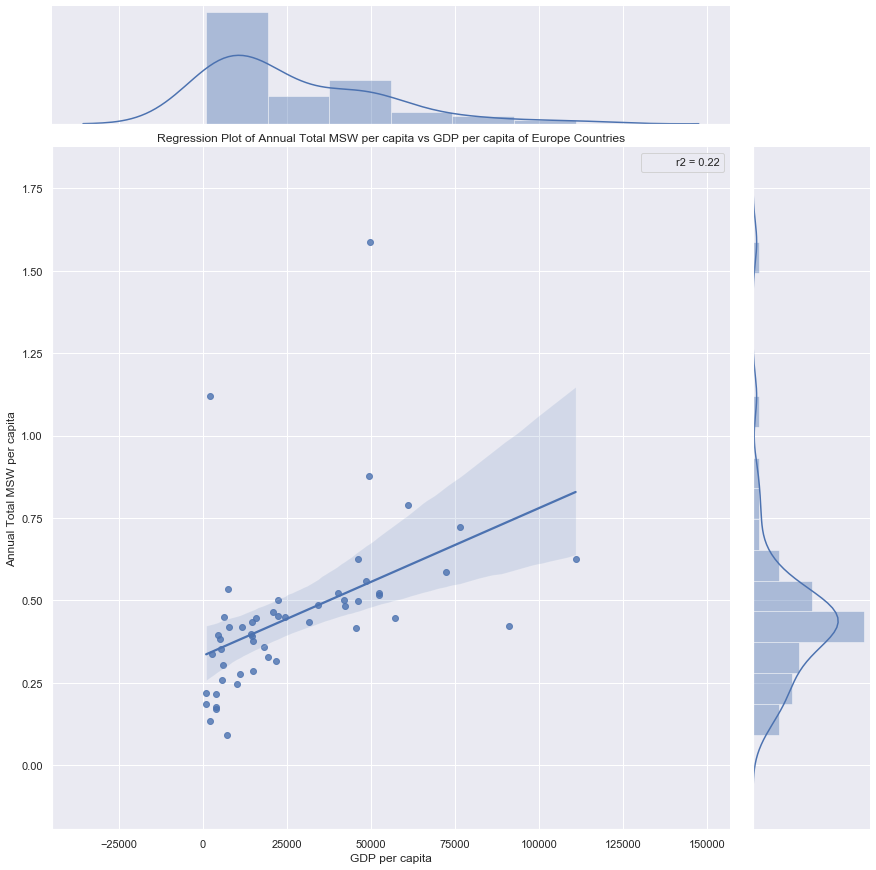

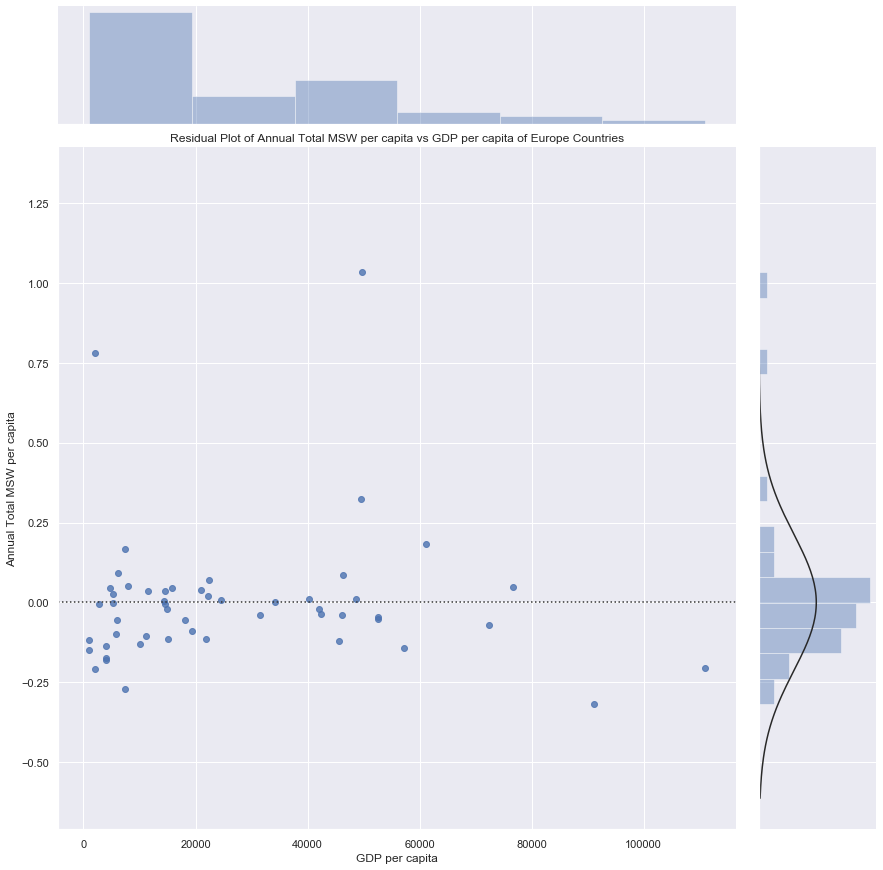

In [8]:
# Europe minus United Kingdom
ECS_df = continent_df.loc[continent_df['region_id'] == 'ECS']
x_ECS = ECS_df['GDP per capita'].tolist()
y_ECS = ECS_df['Annual Total MSW per capita'].tolist()
sns.jointplot(x_ECS, y_ECS, kind='reg', stat_func=r2, size=12)
plt.title('Regression Plot of Annual Total MSW per capita vs GDP per capita of Europe Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

sns.jointplot(x_ECS, y_ECS, kind = 'resid', stat_func=r2, size=12)
plt.title('Residual Plot of Annual Total MSW per capita vs GDP per capita of Europe Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

Text(79.0, 0.5, 'Annual Total MSW per capita')

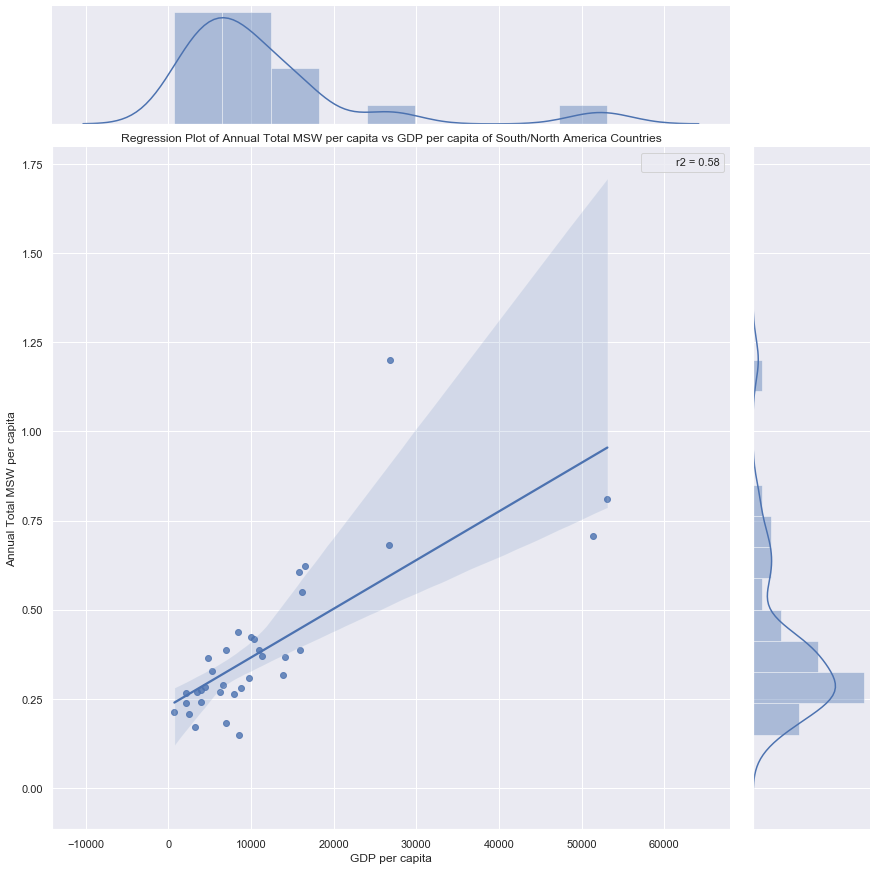

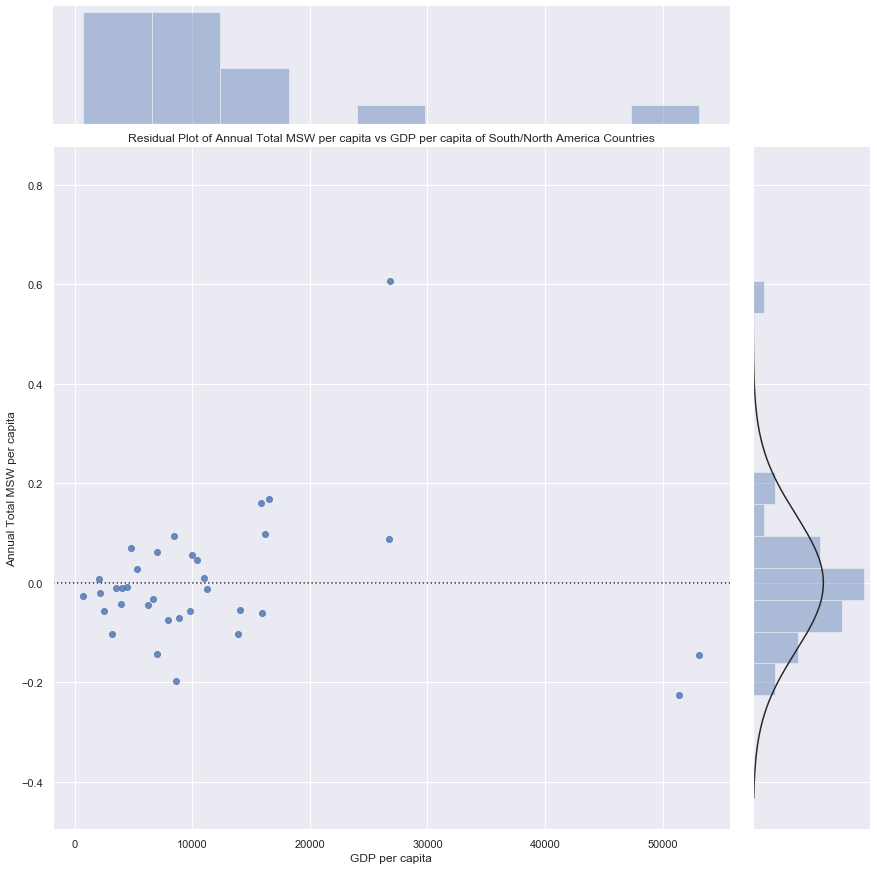

In [9]:
# Latin America (South America) + North America 
LCN_NAC_df = continent_df.loc[(continent_df['region_id'] == 'LCN') | (continent_df['region_id'] == 'NAC')]
x_LCN_NAC = LCN_NAC_df['GDP per capita'].tolist()
y_LCN_NAC = LCN_NAC_df['Annual Total MSW per capita'].tolist()
sns.jointplot(x_LCN_NAC, y_LCN_NAC, kind='reg', stat_func=r2, size=12)
plt.title('Regression Plot of Annual Total MSW per capita vs GDP per capita of South/North America Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

sns.jointplot(x_LCN_NAC, y_LCN_NAC, kind='resid', stat_func=r2, size=12)
plt.title('Residual Plot of Annual Total MSW per capita vs GDP per capita of South/North America Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

Text(79.0, 0.5, 'Annual Total MSW per capita')

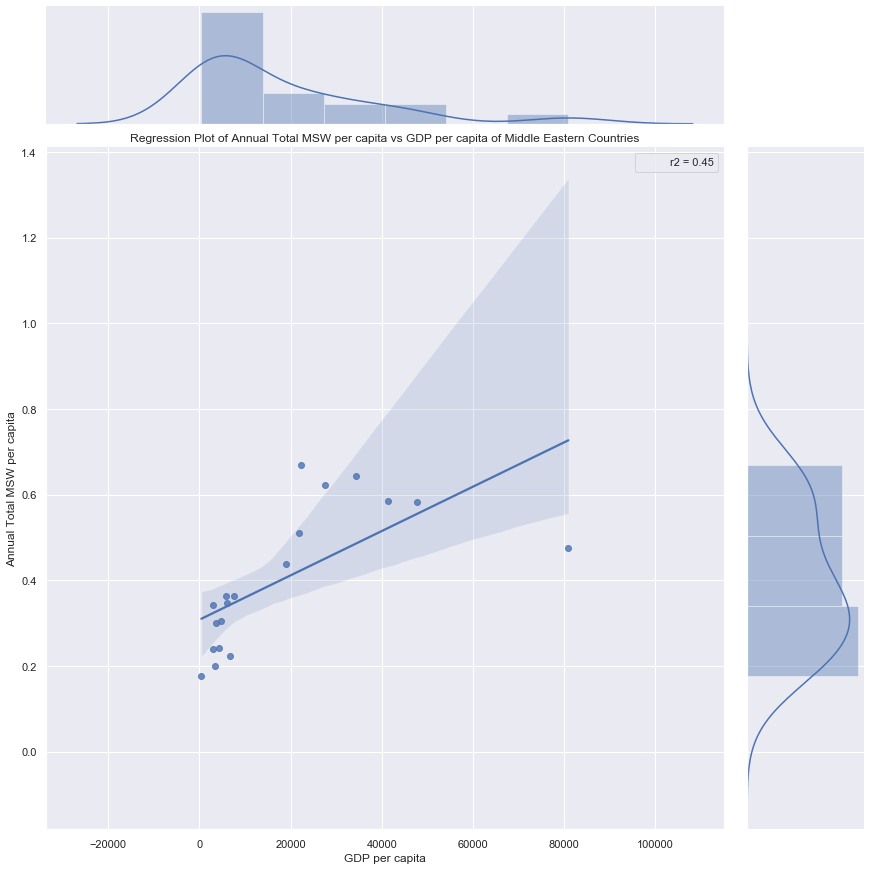

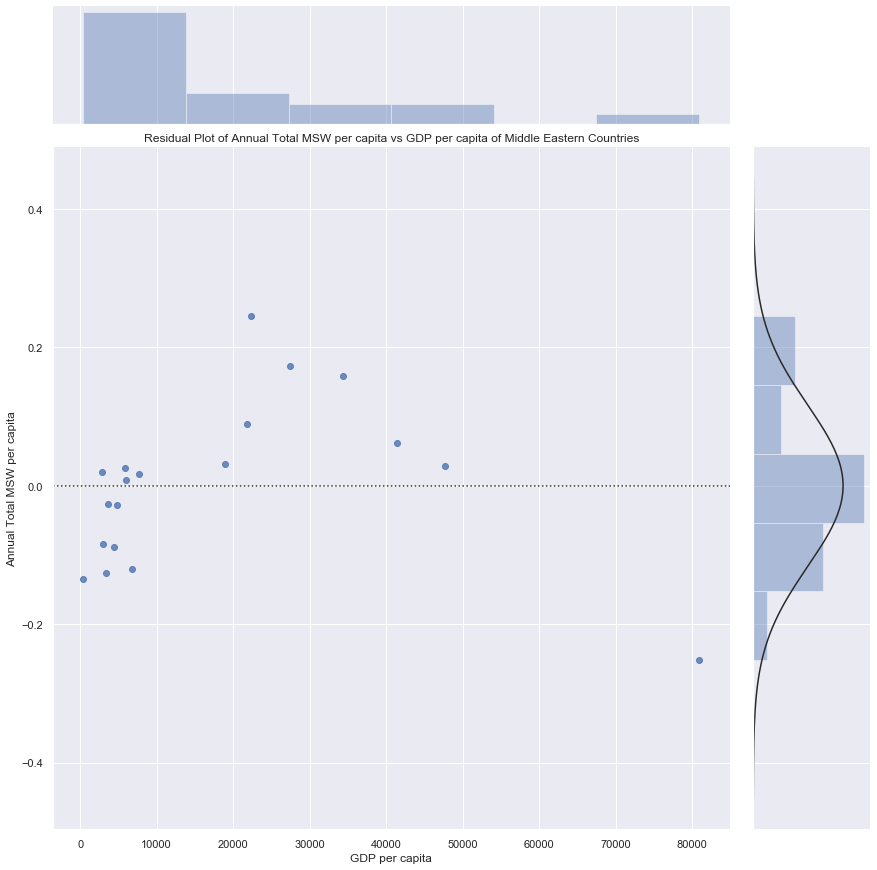

In [10]:
# Middle East
MEA_df = continent_df.loc[continent_df['region_id'] == 'MEA']
x_MEA = MEA_df['GDP per capita'].tolist()
y_MEA = MEA_df['Annual Total MSW per capita'].tolist()
sns.jointplot(x_MEA, y_MEA, kind='reg', stat_func=r2, size=12)
plt.title('Regression Plot of Annual Total MSW per capita vs GDP per capita of Middle Eastern Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

sns.jointplot(x_MEA, y_MEA, kind='resid', stat_func=r2, size=12)
plt.title('Residual Plot of Annual Total MSW per capita vs GDP per capita of Middle Eastern Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

Text(79.0, 0.5, 'Annual Total MSW per capita')

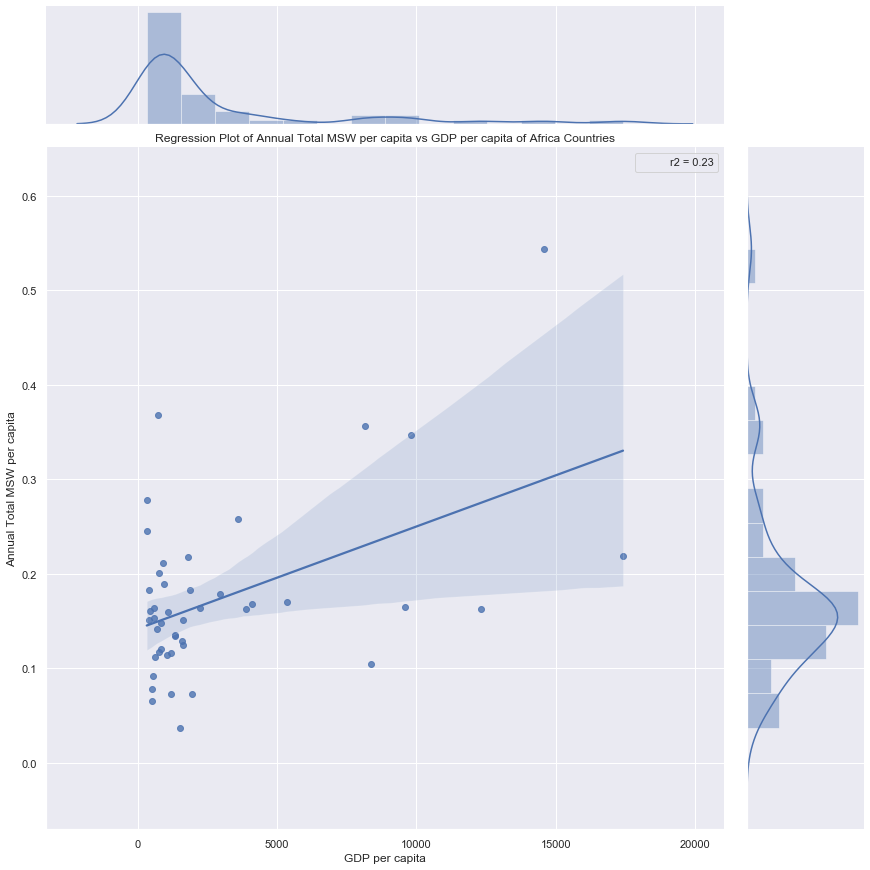

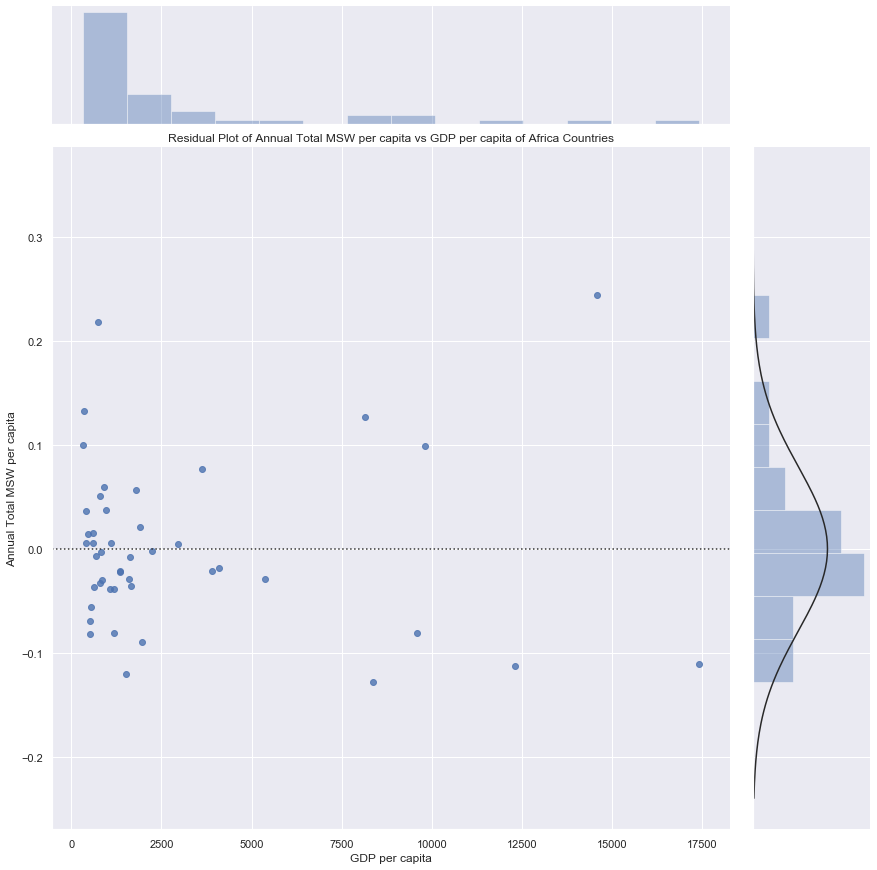

In [13]:
# Africa
SSF_df = continent_df.loc[continent_df['region_id'] == 'SSF']
x_SSF = SSF_df['GDP per capita'].tolist()
y_SSF = SSF_df['Annual Total MSW per capita'].tolist()
sns.jointplot(x_SSF, y_SSF, kind='reg', stat_func=r2, size = 12)
plt.title('Regression Plot of Annual Total MSW per capita vs GDP per capita of Africa Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

sns.jointplot(x_SSF, y_SSF, kind='resid', stat_func=r2, size=12)
plt.title('Residual Plot of Annual Total MSW per capita vs GDP per capita of Africa Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

In [36]:
# Countries with similar economic and development levels with Singapore

percentile_75 = clean_global_df['GDP per capita'].quantile(0.75)
percentile_100 = clean_global_df['GDP per capita'].quantile(1)

reset_global_df = clean_global_df.reset_index()
to_drop = []

for i in range(0,len(reset_global_df['GDP per capita'])):
    if reset_global_df['GDP per capita'][i] <= percentile_75:
        to_drop.append(i)
        
rich_global_df_f = reset_global_df.drop(reset_global_df.index[to_drop])
rich_global_df_r = rich_global_df_f.reset_index()
rich_global_df_r

,level_0,index,region_id,country_name,gdp,population,total msw,GDP per capita,Annual Total MSW per capita
0,3,4,ECS,Andorra,3.319880e+09,82431.0,4.300000e+04,40275.0,0.521648
1,4,5,MEA,United Arab Emirates,3.842225e+11,9269612.0,5.413453e+06,41450.0,0.584000
2,9,10,EAS,Australia,1.349305e+12,23789338.0,1.334500e+07,56719.0,0.560966
3,10,11,ECS,Austria,4.200405e+11,8633169.0,4.836000e+06,48654.0,0.560165
4,13,14,ECS,Belgium,5.151026e+11,11274196.0,4.708000e+06,45689.0,0.417591
5,18,19,MEA,Bahrain,3.176906e+10,1425171.0,9.519430e+05,22291.0,0.667950
6,19,20,LCN,"Bahamas, The",1.034380e+10,386838.0,2.640000e+05,26739.0,0.682456
7,26,28,EAS,Brunei Darussalam,1.330146e+10,423196.0,2.162532e+05,31431.0,0.511000
8,30,32,NAC,Canada,1.828002e+12,35544564.0,2.510303e+07,51428.0,0.706241
9,31,33,ECS,Switzerland,6.420897e+11,8372098.0,6.056000e+06,76694.0,0.723355


Text(79.0, 0.5, 'Annual Total MSW per capita')

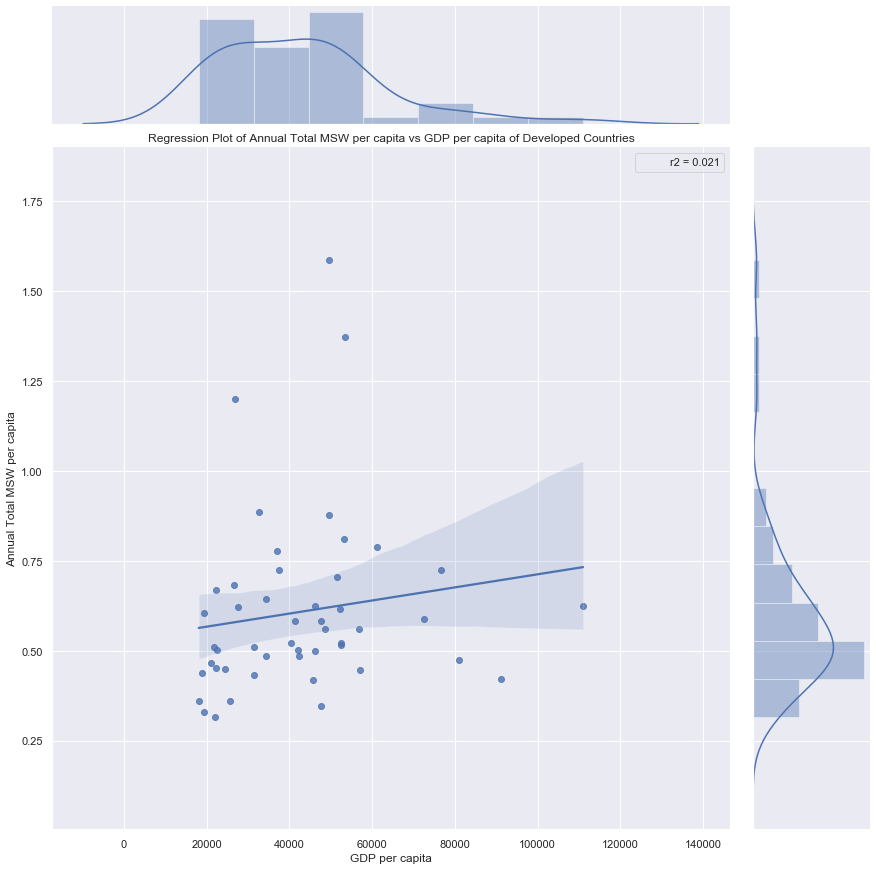

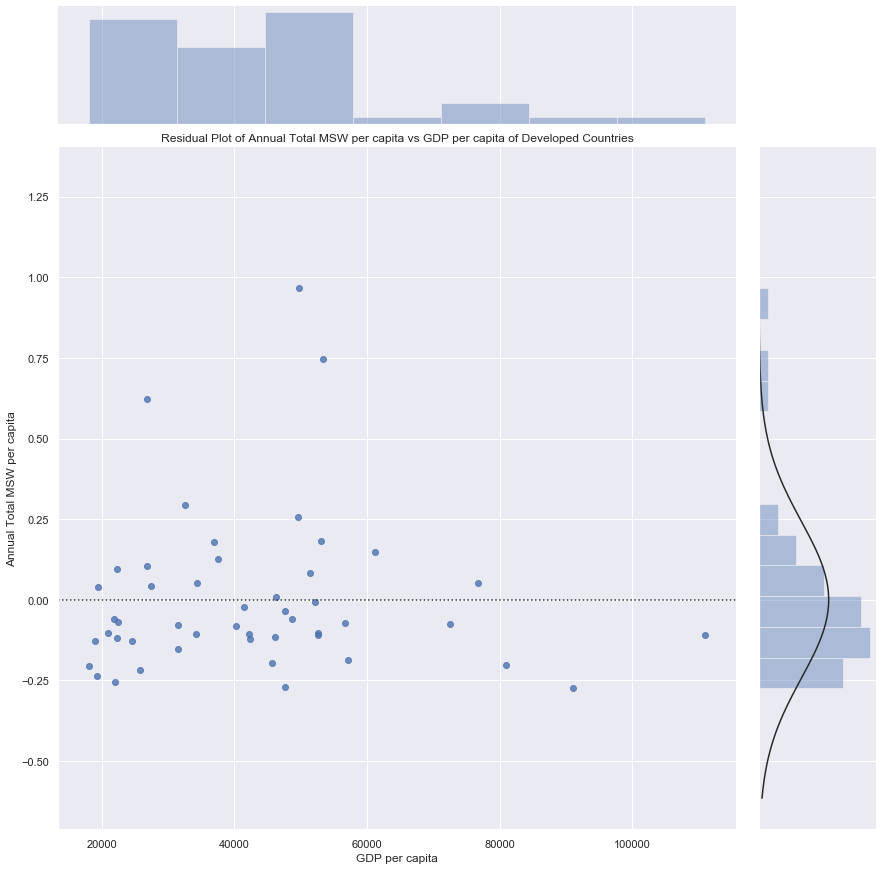

In [41]:
# Relationship between MSW and GDP for Rich Countries

x_rich = rich_global_df_r['GDP per capita'].tolist()
y_rich = rich_global_df_r['Annual Total MSW per capita'].tolist()
rich_global_df_f['GDP per capita'].tolist()
sns.jointplot(x_rich, y_rich, kind='reg', stat_func=r2, size=12)
plt.title('Regression Plot of Annual Total MSW per capita vs GDP per capita of Developed Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 

sns.jointplot(x_rich, y_rich, kind='resid', stat_func=r2, size=12)
plt.title('Residual Plot of Annual Total MSW per capita vs GDP per capita of Developed Countries')
plt.xlabel('GDP per capita')
plt.ylabel('Annual Total MSW per capita') 